In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

In [49]:
df = pd.read_csv('orders.csv')
df.head()

,item_line_id,order_id,item_name
0,1,1,Scale
1,2,1,Notebook
2,3,1,Book
3,4,1,Eraser
4,5,1,Paper


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   item_line_id  484 non-null    int64 
 1   order_id      484 non-null    int64 
 2   item_name     484 non-null    object
dtypes: int64(2), object(1)
memory usage: 11.5+ KB


In [51]:
df['item_name'].value_counts()

item_name
Pen                 58
Eraser              55
Pencil              51
Book                50
Scale               48
Stapler             48
Pencil Sharpener    47
Paper               46
Notebook            42
Highlighter         39
Name: count, dtype: int64

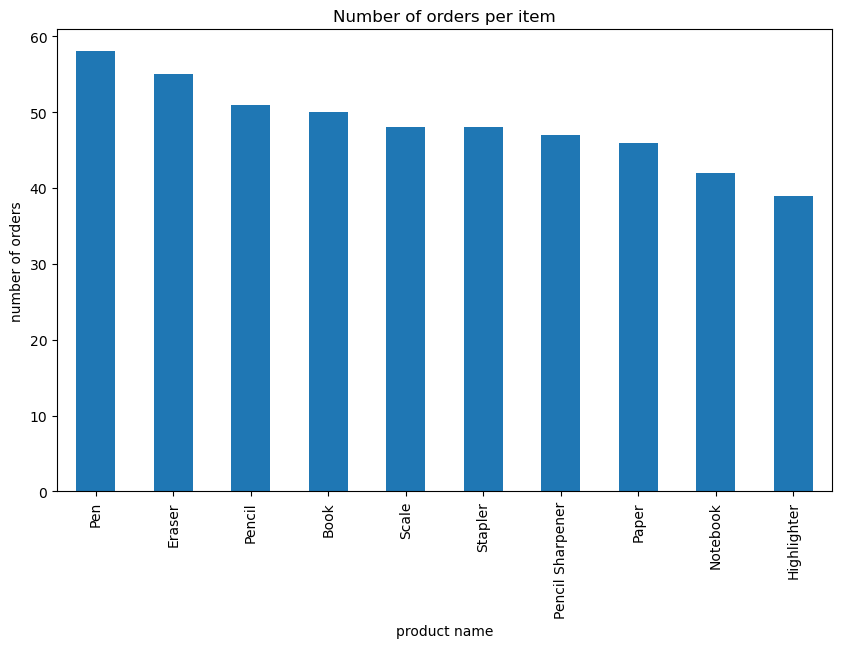

In [52]:
plt.figure(figsize=(10,6))
df['item_name'].value_counts().plot(kind='bar')
plt.title('Number of orders per item')
plt.xlabel('product name')
plt.ylabel('number of orders')
plt.show()

/home/akshirsagar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/akshirsagar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/akshirsagar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/akshirsagar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a fut

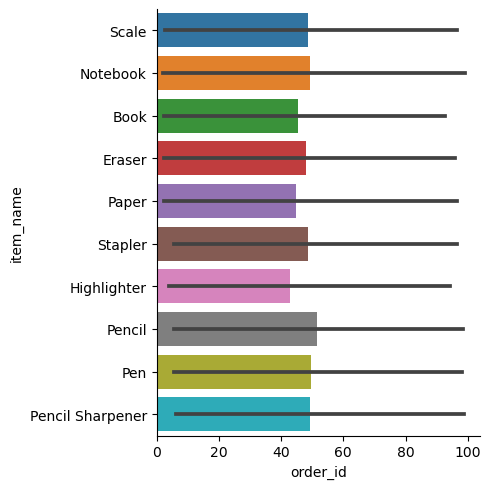

In [53]:
sns.catplot(data=df, x="order_id", y="item_name", errorbar=("pi", 95), kind="bar")

In [54]:
frequency = df['item_name'].value_counts().reset_index()
frequency.columns = ['product_name', 'frequency']

total_transactions = df['order_id'].nunique()
frequency['support'] = frequency['frequency'] / total_transactions

frequency

,product_name,frequency,support
0,Pen,58,0.58
1,Eraser,55,0.55
2,Pencil,51,0.51
3,Book,50,0.50
4,Scale,48,0.48
5,Stapler,48,0.48
6,Pencil Sharpener,47,0.47
7,Paper,46,0.46
8,Notebook,42,0.42
9,Highlighter,39,0.39


In [55]:
grouped = df.groupby(['order_id', 'item_name'])['item_name'].count()
grouped

order_id  item_name       
1         Book                1
          Eraser              1
          Notebook            1
          Paper               1
          Scale               1
                             ..
100       Eraser              1
          Notebook            1
          Pen                 1
          Pencil              1
          Pencil Sharpener    1
Name: item_name, Length: 484, dtype: int64

In [56]:
# grouped = df.groupby(['order_id', 'item_name']).all()

# Unstack the item_name level
unstacked = grouped.unstack()
unstacked


item_name,Book,Eraser,Highlighter,Notebook,Paper,Pen,Pencil,Pencil Sharpener,Scale,Stapler
order_id,,,,,,,,,,
1,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
2,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0
3,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
4,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
97,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
98,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [57]:

# Reset index to turn order_id back into a column
reset = unstacked.reset_index()
reset

item_name,order_id,Book,Eraser,Highlighter,Notebook,Paper,Pen,Pencil,Pencil Sharpener,Scale,Stapler
0,1,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
1,2,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0
2,3,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
3,4,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,5,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
95,96,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
96,97,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
97,98,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
98,99,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0


In [58]:

# Fill NaN values with 0
filled = reset.fillna(0)
filled

item_name,order_id,Book,Eraser,Highlighter,Notebook,Paper,Pen,Pencil,Pencil Sharpener,Scale,Stapler
0,1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
96,97,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
97,98,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
98,99,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [59]:

# Set order_id as the index again
basket = filled.set_index('order_id')
basket

item_name,Book,Eraser,Highlighter,Notebook,Paper,Pen,Pencil,Pencil Sharpener,Scale,Stapler
order_id,,,,,,,,,,
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
98,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [68]:
frequent_itemsets = apriori(basket, min_support=0.4, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head()

/home/akshirsagar/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pen),(Eraser),0.58,0.55,0.4,0.689655,1.253918,0.081,1.45,0.482143
1,(Eraser),(Pen),0.55,0.58,0.4,0.727273,1.253918,0.081,1.54,0.450000


In [61]:
rules['lift'].max()

5.208333333333334

In [69]:
rules[ (rules['lift']>5) & (rules['confidence']>0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
